<a href="https://colab.research.google.com/github/HomayounfarM/Regression/blob/main/colab_pd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/HomayounfarM/Regression

In [16]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd
url = "https://raw.githubusercontent.com/HomayounfarM/Regression/main/Salary_Data.csv"
dataset = pd.read_csv(url)

In [18]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import nan

In [19]:
# Importing the dataset

x = dataset.iloc[:, 0]

y = dataset.iloc[:,1]

In [ ]:
# Taking care of missing data
"""x.fillna(x.mean(), inplace=True)"""


# Replacing missing values with a constant (10)
"""#x.iloc[:,[1,2]] = x.iloc[:,[1,2]].replace(nan,10)"""

# Using sklearn.impute to take care of the missing data
"""from sklearn.impute import SimpleImputer
x_dummy = dataset.iloc[:, [1,2]]
imputer = SimpleImputer(missing_values = nan, strategy = 'mean')
transformed_values = imputer.fit_transform(x_dummy)
x.iloc[:, [1,2]] = transformed_values"""

In [ ]:
# Encoding categorical variable
"""from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x = LabelEncoder()
#x.iloc[:,0] = labelencoder_x.fit_transform(x.iloc[:,0])
onehotencoder = OneHotEncoder()
transformed = onehotencoder.fit_transform(x[['Country']]).toarray()
x[['France', 'Spain', 'Germany']] = transformed
x = x.iloc[:,[1,2,3,4,5]]
labelencoder_y = LabelEncoder()
y.iloc[:] = labelencoder_y.fit_transform(y.iloc[:])"""

In [20]:
# Splitting the dataset to the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state=0)
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)

"""# Splitting the dataset to the training set and test set using NUMPY and mask
#mask = np.random.rand(len(y)) <= 0.6
#x_train = x[mask]
#x_test = x[~mask]"""

'# Splitting the dataset to the training set and test set using NUMPY and mask\n#mask = np.random.rand(len(y)) <= 0.6\n#x_train = x[mask]\n#x_test = x[~mask]'

In [ ]:
# feature scaling
"""from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train.iloc[:,[0,1]] = sc_x.fit_transform(x_train.iloc[:,[0,1]])
x_test.iloc[:,[0,1]] = sc_x.fit_transform(x_test.iloc[:,[0,1]])"""

In [21]:
# Fitting Simple Linear Regression to the Trainig Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

reg = regressor.fit(x_train, y_train)

print(f'Coefficient of determination: {reg.score(x_train, y_train)}')
print(reg.coef_)
print(reg.intercept_)
print(reg.predict(np.array([[100]])))

Coefficient of determination: 0.9381900012894278
[[9345.94244312]]
[26816.19224403]
[[961410.43655627]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


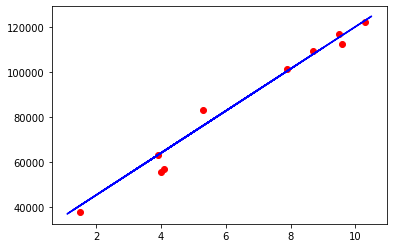

In [22]:
# Predictign the test set results

y_pred = pd.DataFrame(regressor.predict(x_test))

# Visualizing the trainig set result
y_pred = pd.DataFrame(regressor.predict(x_train))

plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train['YearsExperience'], y_pred[0], color = 'blue')

plt.show()